<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [32]:
import pandas as pd
import numpy as np


We will import the following libraries for the lab


In [35]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names=['Class 0', 'Class 1']):
    """
    This function plots the confusion matrix using Matplotlib and Seaborn.
    
    Parameters:
    - y_true: array-like of shape (n_samples,)
      True class labels.
    - y_pred: array-like of shape (n_samples,)
      Predicted class labels.
    - class_names: list of str, optional (default=['Class 0', 'Class 1'])
      List of class names for the confusion matrix labels.
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create a heatmap
    plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    
    # Add axis labels and title
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('True Labels', fontsize=12)
    plt.title('Confusion Matrix', fontsize=14)
    
    # Rotate tick labels for better readability
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    
    # Display the plot
    plt.tight_layout()  # Ensure the plot fits well within the figure
    plt.show()

## Load the dataframe


Load the data


In [44]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)
print(data.head())

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [46]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(URL2)
print(X.head(100))

    FlightNumber   PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0            1.0   6104.959412      1.0    1.0          0.0          0.0   
1            2.0    525.000000      1.0    1.0          0.0          0.0   
2            3.0    677.000000      1.0    1.0          0.0          0.0   
3            4.0    500.000000      1.0    1.0          0.0          0.0   
4            5.0   3170.000000      1.0    1.0          0.0          0.0   
..           ...           ...      ...    ...          ...          ...   
85          86.0  15400.000000      2.0    5.0          2.0          0.0   
86          87.0  15400.000000      3.0    5.0          2.0          0.0   
87          88.0  15400.000000      6.0    5.0          5.0          0.0   
88          89.0  15400.000000      3.0    5.0          2.0          0.0   
89          90.0   3681.000000      1.0    5.0          0.0          0.0   

    Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0         0.0     

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [48]:
# Convert the 'Class' column to a NumPy array and assign to Y
Y = data['Class'].to_numpy()
print("Y (First 5 values):", Y[:5])

Y (First 5 values): [0 0 0 0 0]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [58]:
# students get this 
# Drop irrelevant non-numeric columns (e.g., date column if not needed)
if 'Date' in data.columns:  # Replace 'Date' with the actual column name if different
    data = data.drop(['Date'], axis=1)

# Convert categorical variables to numeric if present
data = pd.get_dummies(data, drop_first=True)

# Separate features (X) and target (Y)
X = data.drop(['Class'], axis=1)
Y = data['Class']

# Standardize the numeric features in X
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("X (First 5 rows after standardization):\n", X[:5])

X (First 5 rows after standardization):
 [[-1.71291154e+00 -1.94814463e-16 -6.53912840e-01 -1.87082869e+00
  -8.35531692e-01 -1.93309133e+00 -1.57589457e+00 -9.73440458e-01
   4.11430496e-01 -4.17072999e-01 -1.05999788e-01 -6.54653671e-01
  -1.05999788e-01 -5.51677284e-01  3.44342023e+00 -1.85695338e-01
  -3.33333333e-01 -1.05999788e-01 -2.42535625e-01 -4.29197538e-01
  -5.68796459e-01 -4.10890702e-01 -1.50755672e-01 -1.05999788e-01
  -1.50755672e-01  1.93309133e+00 -9.14732034e-01 -2.42535625e-01
  -4.29197538e-01 -1.50755672e-01 -7.97724035e-01 -1.50755672e-01
  -3.92232270e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.50755672e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.50755672e-01 -

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [60]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (72, 85)
Shape of X_test: (18, 85)
Shape of Y_train: (72,)
Shape of Y_test: (18,)


we can see we only have 18 test samples.


In [63]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [71]:
# Create logistic regression object
lr = LogisticRegression()

# Define the parameter grid
parameters = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}

# Perform GridSearchCV
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [74]:
# Display the best parameters and accuracy
print("Tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("Accuracy on validation data:", logreg_cv.best_score_)

Tuned hyperparameters (best parameters): {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy on validation data: 0.9035714285714287


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [77]:
# Calculate accuracy on test data
accuracy_test = logreg_cv.score(X_test, Y_test)
print("Accuracy on test data:", accuracy_test)

# Plot the confusion matrix
def plot_confusion_matrix(y, y_predict):
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Did not land', 'Landed'])
    ax.yaxis.set_ticklabels(['Did not land', 'Landed'])
    plt.show()

Accuracy on test data: 0.8333333333333334


Lets look at the confusion matrix:


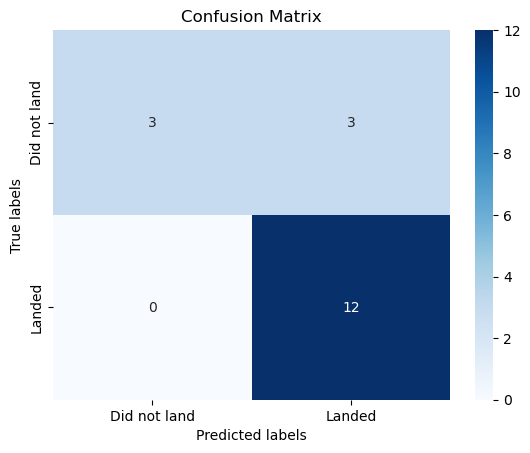

In [80]:
# Predictions on test data
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [84]:
# Create an SVM object
svm = SVC()

# Define the parameter grid
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Perform GridSearchCV
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [85]:
# Display the best parameters and accuracy
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Accuracy on validation data:", svm_cv.best_score_)

Tuned hyperparameters (best parameters): {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy on validation data: 0.9446428571428571


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


Accuracy on the test data: 0.8333


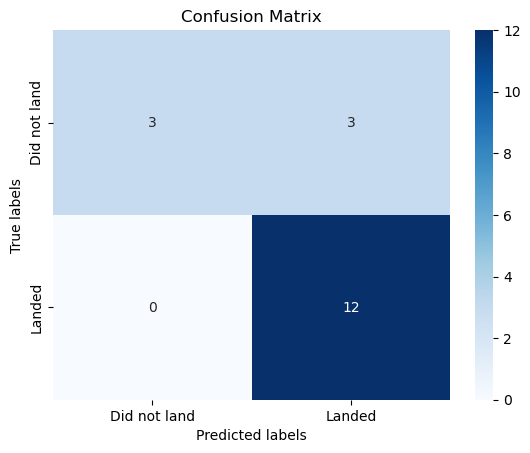

In [89]:
# Calculate accuracy on the test data
accuracy = svm_cv.score(X_test, Y_test)
print(f"Accuracy on the test data: {accuracy:.4f}")

# Predict on the test data
yhat = svm_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat)

We can plot the confusion matrix


## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define parameters for the decision tree
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create DecisionTreeClassifier and GridSearchCV
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the model to the training data
tree_cv.fit(X_train, Y_train)

C:\Users\nabis\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nabis\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nabis\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\nabis\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\nabis\anaconda3\Lib\site-pac

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [105]:
# Display the best parameters and best score
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Best accuracy:", tree_cv.best_score_)

Tuned hyperparameters (best parameters): {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best accuracy: 0.9339285714285716


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


Accuracy on the test data (Decision Tree): 0.6667


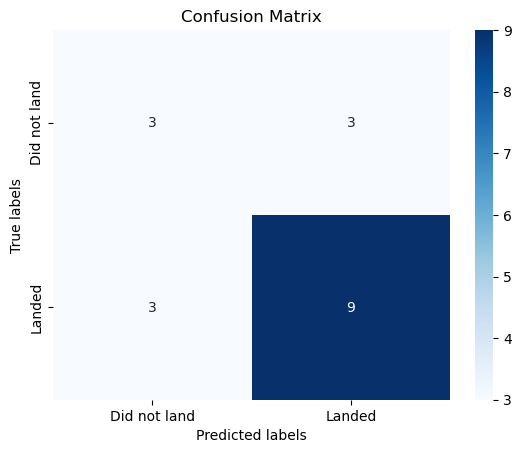

In [108]:
# Calculate accuracy on the test data
accuracy_tree = tree_cv.score(X_test, Y_test)
print(f"Accuracy on the test data (Decision Tree): {accuracy_tree:.4f}")

# Predict on the test data
yhat_tree = tree_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat_tree)

We can plot the confusion matrix


## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [113]:
from sklearn.neighbors import KNeighborsClassifier

# Define parameters for KNN
parameters_knn = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create KNeighborsClassifier and GridSearchCV
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters_knn, cv=10)

# Fit the model to the training data
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [116]:
# Display the best parameters and best score
print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Best accuracy:", knn_cv.best_score_)

Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 8, 'p': 1}
Best accuracy: 0.9035714285714287


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


Accuracy on the test data (KNN): 0.8333


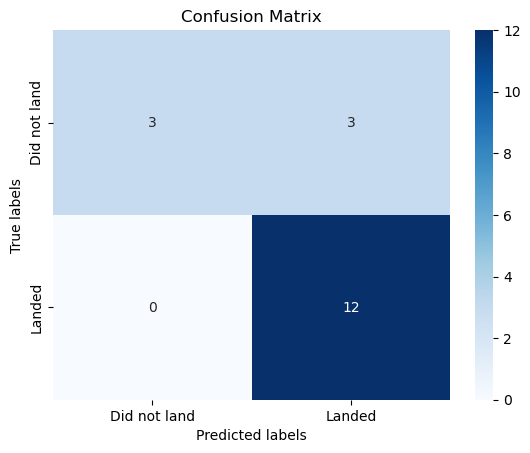

In [119]:
# Calculate accuracy on the test data
accuracy_knn = knn_cv.score(X_test, Y_test)
print(f"Accuracy on the test data (KNN): {accuracy_knn:.4f}")

yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_knn)

We can plot the confusion matrix


## TASK  12


Find the method performs best:


In [ ]:
# Compare the accuracy of the three models
print("Accuracy for Logistic Regression:", logreg_cv.best_score_)
print("Accuracy for SVM:", accuracy)
print("Accuracy for Decision Tree:", accuracy_tree)
print("Accuracy for KNN:", accuracy_knn)

# Find the best model
best_accuracy = max(accuracy, accuracy_tree, accuracy_knn)
if best_accuracy == accuracy:
    print("The best model is SVM.")
elif best_accuracy == accuracy_tree:
    print("The best model is Decision Tree.")
else:
    print("The best model is KNN.")

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
